# mapping each fruit category to its shelf life range in days based on the image annotation and label class.
     FRUIT CLASS    OBSERVED SHELF LIFE
    'Apple Fresh': '9-14',
    'Apple Semifresh': '4-8',
    'Apple Semirotten': '1-3',
    'Apple Rotten': '0',

    'Banana Fresh': '6-9',
    'Banana Semifresh': '2-5',
    'Banana Semirotten': '1',
    'Banana Rotten': '0',

    'Peach Fresh': '9-12',
    'Peach Semifresh': '4-8',
    'Peach Semirotten': '1-3',
    'Peach Rotten': '0',

    'Pear Fresh': '9-14',
    'Pear Semifresh': '4-8',
    'Pear Semirotten': '1-3',
    'Pear Rotten': '0',

    'Mango Fresh': '7-12',
    'Mango Semifresh': '3-6',
    'Mango Semirotten': '1-2',
    'Mango Rotten': '0',

    'Orange Fresh': '7-10',
    'Orange Semifresh': '3-6',
    'Orange Semirotten': '1-2',
    'Orange Rotten': '0',

    'Melon Fresh': '7-10',
    'Melon Semifresh': '3-6',
    'Melon Semirotten': '1-2',
    'Melon Rotten': '0'


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt

In [2]:
# Importing required labels data
import pandas as pd
labels = pd.read_csv("/content/drive/MyDrive/Fruits Detection and Quality Analysis.v1i.tensorflow/label1.csv")
print(labels.describe())

                                                       id          category  \
count                                                5601              5601   
unique                                               5601                28   
top     Image_25_png.rf.3b96ccc43419950b715c35533a6bb4...  Banana Semifresh   
freq                                                    1              1128   

       Class  
count   5601  
unique    12  
top        0  
freq    1529  


In [3]:
labels.head()

,id,category,Class
0,Image_25_png.rf.3b96ccc43419950b715c35533a6bb4...,Apple Fresh,9-14
1,img415_png.rf.3b96b070be6a3ca252421a4d2f7fc78d...,Banana Semifresh,2-5
2,image175_png.rf.3b965bb4b45f0d2ec0ae5a39862cea...,Peach Fresh,9-12
3,img00293_png.rf.3ba7e33569e76448f01adbe3199a47...,Apple Semifresh,4-8
4,image07_png.rf.3ba09074d8de13b2cd96ea1098db566...,Peach Semifresh,4-8


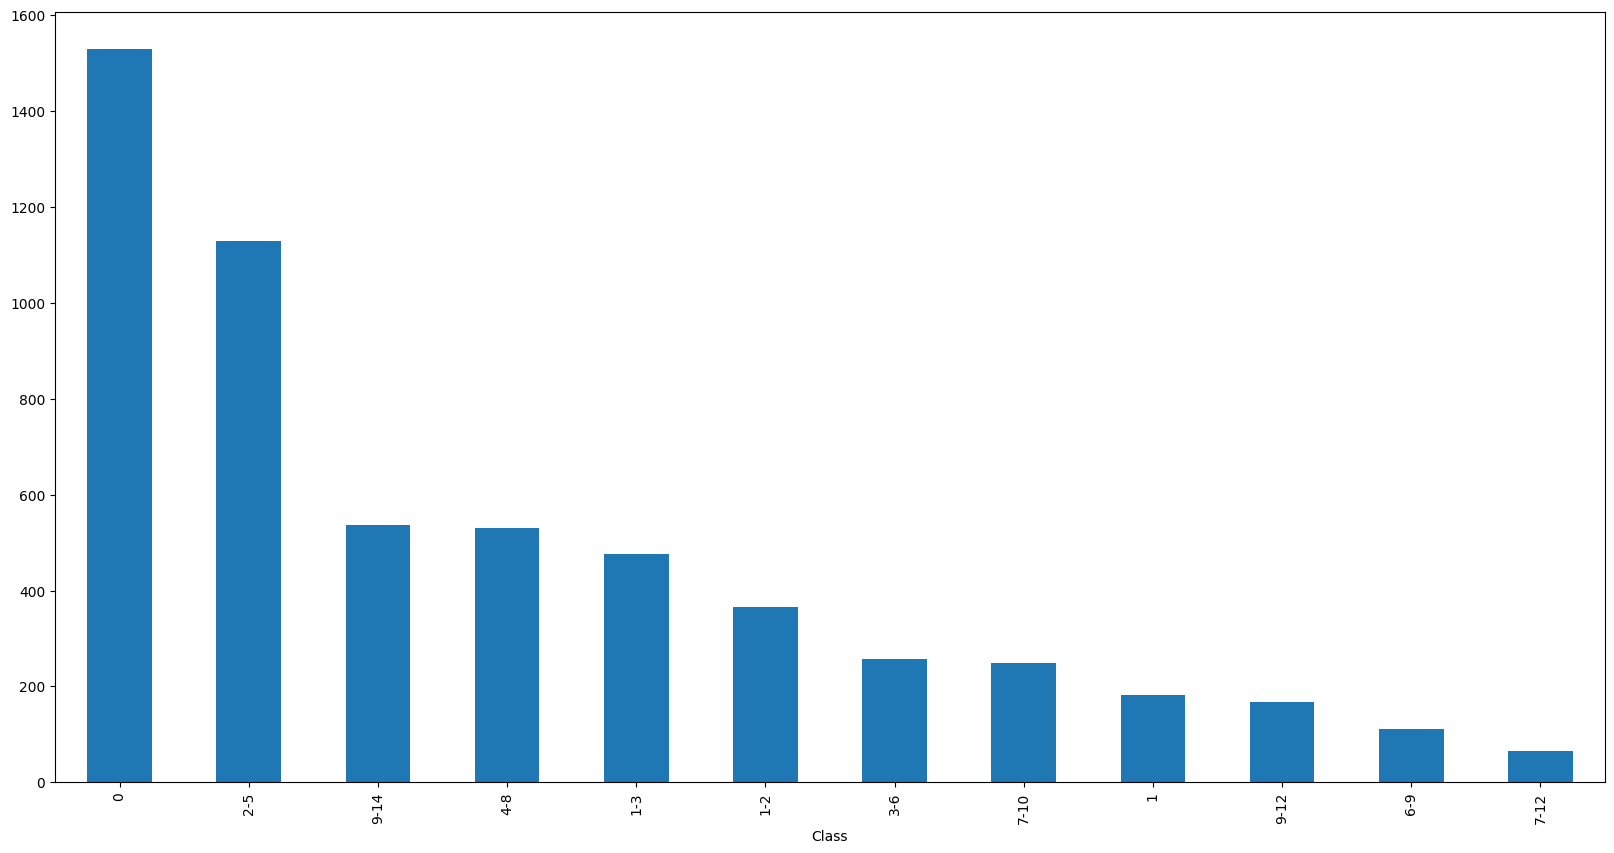

In [4]:
labels["Class"].value_counts().plot.bar(figsize=(20,10));

In [5]:
labels["Class"].value_counts().median()

312.0

In [6]:
# Create pathnames from all image IDs
import numpy as np
filenames = np.array(labels["id"])
# Check the first 10
filenames[:10]

array(['Image_25_png.rf.3b96ccc43419950b715c35533a6bb46c.jpg',
       'img415_png.rf.3b96b070be6a3ca252421a4d2f7fc78d.jpg',
       'image175_png.rf.3b965bb4b45f0d2ec0ae5a39862cea21.jpg',
       'img00293_png.rf.3ba7e33569e76448f01adbe3199a47a1.jpg',
       'image07_png.rf.3ba09074d8de13b2cd96ea1098db5668.jpg',
       'Image_47_jpeg.rf.3bc57d0c5f8e014ff11694ea6504e03f.jpg',
       'banana_2-994-_jpg.rf.3b929439bdc4011763912fa533f8d285.jpg',
       'mango_2-962-_jpg.rf.3bb30517c241221c72224ce48ffeec1c.jpg',
       'image421_png.rf.3cf2ad9d3c77d38d5091bf7bf900c709.jpg',
       'orange_2-205-_png.rf.3c1070841bf3b197c3748adfe2b6d094.jpg'],
      dtype=object)

In [7]:
len(filenames)

5601

In [8]:
import os

# Define the path to the train directory
train_directory = '/content/drive/MyDrive/Fruits Detection and Quality Analysis.v1i.tensorflow/train'

# Count the number of image files in the train directory

image_count = len([img for img in os.listdir(train_directory) if os.path.isfile(os.path.join(train_directory, img))])

print(f"Total number of images in the train directory: {image_count}")


Total number of images in the train directory: 5601


In [9]:
# Checking whether the number of filenames in csv matches the actual number of image files in train directory
import os
if len(os.listdir("/content/drive/MyDrive/Fruits Detection and Quality Analysis.v1i.tensorflow/train")) == len(filenames):
  print("Filenames' numbers match.")
else:
  print("Different numbers uploaded and processed. Check again.")


Filenames' numbers match.


In [10]:
import numpy as np
classes = labels["Class"].to_numpy()
classes


array(['9-14', '2-5', '9-12', ..., '0', '9-14', '2-5'], dtype=object)

In [11]:

# Unique Label values
unique_classes = np.unique(classes)
len(unique_classes)

12

In [12]:

# Turn every label into a boolean array
boolean_labels = [fruitclass == unique_classes for fruitclass in classes]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False,  True]),
 array([False, False, False, False,  True, False, False, False, False,
        False, False, False])]

In [13]:

len(boolean_labels)

5601

In [14]:
# Setting X and y variables
X = filenames
y = boolean_labels

In [15]:

# Splitting data into training and validation sets
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)

len(X_train),len(X_val),len(y_train),len(y_val)

(4480, 1121, 4480, 1121)

In [16]:
# Uninstall the current version of TensorFlow
!pip uninstall -y tensorflow tensorflow-hub

# Install the desired version of TensorFlow
!pip install tensorflow==2.12.0 tensorflow-hub==0.14.0

Found existing installation: tensorflow 2.12.0
Uninstalling tensorflow-2.12.0:
  Successfully uninstalled tensorflow-2.12.0
Found existing installation: tensorflow-hub 0.14.0
Uninstalling tensorflow-hub-0.14.0:
  Successfully uninstalled tensorflow-hub-0.14.0
  Using cached tensorflow-2.12.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
  Using cached tensorflow_hub-0.14.0-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached tensorflow-2.12.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (585.9 MB)
Using cached tensorflow_hub-0.14.0-py2.py3-none-any.whl (90 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.12.0 which is incompatible.


In [17]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint
import os

In [18]:
IMG_SIZE = 224  # Size of the images
BATCH_SIZE = 32  # Batch size for training
EPOCHS = 10  # Number of training epochs
DATASET_PATH = '/content/drive/MyDrive/Fruits Detection and Quality Analysis.v1i.tensorflow/train/'  # Path to your images
CSV_PATH = '/content/drive/MyDrive/Fruits Detection and Quality Analysis.v1i.tensorflow/label1.csv'  # Path to your CSV file
CHECKPOINT_DIR = '/content/drive/MyDrive/Fruits Detection and Quality Analysis.v1i.tensorflow/'  # Checkpoint directory


In [21]:
# Load the dataset
data = pd.read_csv(CSV_PATH)

# Split the data into training and testing
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data['Class'])

# Define the ImageDataGenerator for training and testing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Generate batches of tensor image data from the dataframes
train_generator = train_datagen.flow_from_dataframe(
    train_data,
    directory=DATASET_PATH,
    x_col='id',
    y_col='Class',
    target_size=(IMG_SIZE, IMG_SIZE),
    class_mode='categorical',  # Use categorical for multiple classes
    batch_size=BATCH_SIZE
)

test_generator = test_datagen.flow_from_dataframe(
    test_data,
    directory=DATASET_PATH,
    x_col='id',
    y_col='Class',
    target_size=(IMG_SIZE, IMG_SIZE),
    class_mode='categorical',
    batch_size=BATCH_SIZE
)


Found 4480 validated image filenames belonging to 12 classes.
Found 1121 validated image filenames belonging to 12 classes.


In [ ]:
# Load MobileNetV2 model from TensorFlow Hub
base_model = tf.keras.applications.MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False  # Freeze the base model

# Add classification layers on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_generator.class_indices), activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Create a checkpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=os.path.join(CHECKPOINT_DIR, 'model_epoch_{epoch:02d}.h5'),  # Save weights with epoch number
    save_weights_only=True,
    monitor='val_accuracy',  # Monitor validation accuracy
    save_best_only=False,  # Change to True to save only the best model
    mode='max',
    verbose=1
)

# Train the model with the checkpoint callback
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=test_generator,
    callbacks=[checkpoint_callback]  # Include the checkpoint callback
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')


Found 4480 validated image filenames belonging to 12 classes.
Found 1121 validated image filenames belonging to 12 classes.
Epoch 1/10
140/140 [==============================] - ETA: 0s - loss: 1.0367 - accuracy: 0.6625 
Epoch 1: saving model to /content/drive/MyDrive/Fruits Detection and Quality Analysis.v1i.tensorflow/model_epoch_01.h5
140/140 [==============================] - 1901s 14s/step - loss: 1.0367 - accuracy: 0.6625 - val_loss: 0.5783 - val_accuracy: 0.7761
Epoch 2/10
140/140 [==============================] - ETA: 0s - loss: 0.6199 - accuracy: 0.7705
Epoch 2: saving model to /content/drive/MyDrive/Fruits Detection and Quality Analysis.v1i.tensorflow/model_epoch_02.h5
140/140 [==============================] - 318s 2s/step - loss: 0.6199 - accuracy: 0.7705 - val_loss: 0.4741 - val_accuracy: 0.8198
Epoch 3/10
140/140 [==============================] - ETA: 0s - loss: 0.5210 - accuracy: 0.8049
Epoch 3: saving model to /content/drive/MyDrive/Fruits Detection and Quality Analys

In [22]:
# Load the MobileNetV2 model structure again (you may need to redefine it if it's not in the current context)
base_model = tf.keras.applications.MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False

# Rebuild your model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_generator.class_indices), activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Load the saved weights
model.load_weights('/content/drive/MyDrive/Fruits Detection and Quality Analysis.v1i.tensorflow/full_model.h5')  # Replace with the desired epoch file
1

1

In [ ]:
model.save('/content/drive/MyDrive/Fruits Detection and Quality Analysis.v1i.tensorflow/full_model.h5')


In [23]:
from tensorflow.keras.preprocessing import image
def pred(img_path):
  IMG_SIZE = 224
  def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Rescale to [0, 1]
    return img_array

  # Load a new image for prediction
  img_array = load_and_preprocess_image(img_path)

  # Make predictions
  predictions = model.predict(img_array)
  predicted_class = np.argmax(predictions, axis=1)

  # Map predicted class back to the class name
  class_labels = list(train_generator.class_indices.keys())
  predicted_label = class_labels[predicted_class[0]]
  return predicted_label



img_path = '/content/drive/MyDrive/Fruits Detection and Quality Analysis.v1i.tensorflow/test/orange_2-258-_png.rf.1372ccba2dc6138e9ff1f429c6615027.jpg'  # Replace with your image path
print(f'Predicted class: {pred(img_path)}')

1/1 [==============================] - 2s 2s/step
Predicted class: 3-6


In [24]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint
import os

IMG_SIZE = 224  # Size of the images
BATCH_SIZE = 32  # Batch size for training
EPOCHS = 10  # Number of training epochs
DATASET_PATH = '/content/drive/MyDrive/Fruits Detection and Quality Analysis.v1i.tensorflow/train/'  # Path to your images
CSV_PATH = '/content/drive/MyDrive/Fruits Detection and Quality Analysis.v1i.tensorflow/label1.csv'  # Path to your CSV file


# Load the dataset
data = pd.read_csv(CSV_PATH)

# Split the data into training and testing
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data['Class'])

# Define the ImageDataGenerator for training and testing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Generate batches of tensor image data from the dataframes
train_generator = train_datagen.flow_from_dataframe(
    train_data,
    directory=DATASET_PATH,
    x_col='id',
    y_col='Class',
    target_size=(IMG_SIZE, IMG_SIZE),
    class_mode='categorical',  # Use categorical for multiple classes
    batch_size=BATCH_SIZE
)

test_generator = test_datagen.flow_from_dataframe(
    test_data,
    directory=DATASET_PATH,
    x_col='id',
    y_col='Class',
    target_size=(IMG_SIZE, IMG_SIZE),
    class_mode='categorical',
    batch_size=BATCH_SIZE
)

# Load the saved model
model_path = '/content/drive/MyDrive/Fruits Detection and Quality Analysis.v1i.tensorflow/full_model.h5'
model = tf.keras.models.load_model(model_path)

# Define the prediction function
def pred(img_path):
    IMG_SIZE = 224

    # Load and preprocess the image
    def load_and_preprocess_image(img_path):
        img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = img_array / 255.0  # Rescale to [0, 1]
        return img_array

    # Load the image and preprocess it
    img_array = load_and_preprocess_image(img_path)

    # Make predictions
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)

    # Use the class indices from the train_generator to map class indices to labels
    class_labels = list(train_generator.class_indices.keys())
    predicted_label = class_labels[predicted_class[0]]
    return predicted_label

# Test the function with a sample image path
img_path = '/content/drive/MyDrive/Fruits Detection and Quality Analysis.v1i.tensorflow/test/orange_2-258-_png.rf.1372ccba2dc6138e9ff1f429c6615027.jpg'  # Replace with your image path
print(f'Predicted class: {pred(img_path)}')


Found 4480 validated image filenames belonging to 12 classes.
Found 1121 validated image filenames belonging to 12 classes.
1/1 [==============================] - 1s 1s/step
Predicted class: 3-6


Found 4480 validated image filenames belonging to 12 classes.
Found 1121 validated image filenames belonging to 12 classes.
1/1 [==============================] - 1s 1s/step


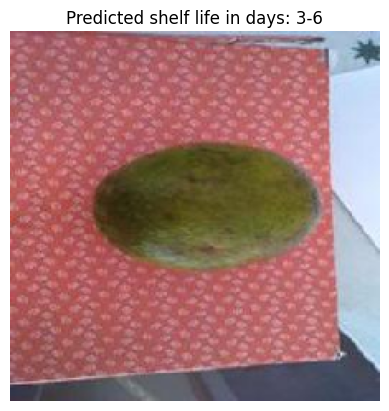

Predicted class: 3-6


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os

IMG_SIZE = 224  # Size of the images
BATCH_SIZE = 32  # Batch size for training
EPOCHS = 10  # Number of training epochs
DATASET_PATH = '/content/drive/MyDrive/Fruits Detection and Quality Analysis.v1i.tensorflow/train/'  # Path to your images
CSV_PATH = '/content/drive/MyDrive/Fruits Detection and Quality Analysis.v1i.tensorflow/label1.csv'  # Path to your CSV file

# Load the dataset
data = pd.read_csv(CSV_PATH)

# Split the data into training and testing
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data['Class'])

# Define the ImageDataGenerator for training and testing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Generate batches of tensor image data from the dataframes
train_generator = train_datagen.flow_from_dataframe(
    train_data,
    directory=DATASET_PATH,
    x_col='id',
    y_col='Class',
    target_size=(IMG_SIZE, IMG_SIZE),
    class_mode='categorical',  # Use categorical for multiple classes
    batch_size=BATCH_SIZE
)

test_generator = test_datagen.flow_from_dataframe(
    test_data,
    directory=DATASET_PATH,
    x_col='id',
    y_col='Class',
    target_size=(IMG_SIZE, IMG_SIZE),
    class_mode='categorical',
    batch_size=BATCH_SIZE
)

# Load the saved model
model_path = '/content/drive/MyDrive/Fruits Detection and Quality Analysis.v1i.tensorflow/full_model.h5'
model = tf.keras.models.load_model(model_path)

# Define the prediction function
def pred(img_path):
    IMG_SIZE = 224

    # Load and preprocess the image
    def load_and_preprocess_image(img_path):
        img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = img_array / 255.0  # Rescale to [0, 1]
        return img_array

    # Load the image and preprocess it
    img_array = load_and_preprocess_image(img_path)

    # Make predictions
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)

    # Use the class indices from the train_generator to map class indices to labels
    class_labels = list(train_generator.class_indices.keys())
    predicted_label = class_labels[predicted_class[0]]

    # Display the input image along with the predicted class label
    display_image_with_prediction(img_path, predicted_label)
    return predicted_label

# Function to display image along with the predicted label
def display_image_with_prediction(img_path, predicted_label):
    # Load and display the image
    img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    plt.imshow(img)
    plt.title(f'Predicted shelf life in days: {predicted_label}')
    plt.axis('off')  # Turn off the axis
    plt.show()

# Test the function with a sample image path
img_path = '/content/drive/MyDrive/Fruits Detection and Quality Analysis.v1i.tensorflow/test/orange_2-258-_png.rf.1372ccba2dc6138e9ff1f429c6615027.jpg'  # Replace with your image path
print(f'Predicted class: {pred(img_path)}')


1/1 [==============================] - 0s 68ms/step


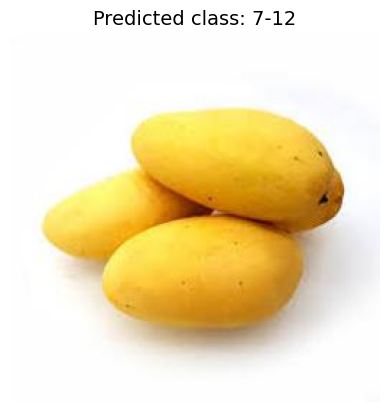

Predicted class: 7-12


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Define the image size
IMG_SIZE = 224

def load_and_preprocess_image(img_path):
    """Load and preprocess the image for prediction."""
    img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Rescale to [0, 1]
    return img_array

# Load a new image for prediction
img_path = '/content/drive/MyDrive/Fruits Detection and Quality Analysis.v1i.tensorflow/test/images_png.rf.486e0394dd8d44df1a709f4ec10c55d6.jpg'  # Replace with your image path
img_array = load_and_preprocess_image(img_path)

# Make predictions using the pre-loaded model
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

# Map predicted class back to the class name
class_labels = list(train_generator.class_indices.keys())
predicted_label = class_labels[predicted_class[0]]

# Display the image and prediction result
plt.imshow(image.load_img(img_path))  # Load the image again for display purposes
plt.axis('off')  # Turn off axis
plt.title(f'Predicted class: {predicted_label}', fontsize=14)  # Display the prediction as the title
plt.show()

# Print the prediction in text format
print(f'Predicted class: {predicted_label}')


In [ ]:
# Save the complete model
model.save('/content/drive/MyDrive/Fruits Detection and Quality Analysis.v1i.tensorflow/weights/model_epoch_10.h5')
1

In [28]:
# Load the dataset
data1 = pd.read_csv(CSV_PATH)

# Split the data into training and testing
train_data1, test_data1 = train_test_split(data1, test_size=0.2, random_state=42, stratify=data['category'])

# Define the ImageDataGenerator for training and testing
train_datagen1 = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen1 = ImageDataGenerator(rescale=1.0 / 255)

# Generate batches of tensor image data from the dataframes
train_generator1 = train_datagen1.flow_from_dataframe(
    train_data1,
    directory=DATASET_PATH,
    x_col='id',
    y_col='category',  # Use 'category' for class labels
    target_size=(IMG_SIZE, IMG_SIZE),
    class_mode='categorical',  # Use categorical for multiple classes
    batch_size=BATCH_SIZE
)

test_generator1 = test_datagen1.flow_from_dataframe(
    test_data1,
    directory=DATASET_PATH,
    x_col='id',
    y_col='category',  # Use 'category' for class labels
    target_size=(IMG_SIZE, IMG_SIZE),
    class_mode='categorical',
    batch_size=BATCH_SIZE
)

Found 4480 validated image filenames belonging to 28 classes.
Found 1121 validated image filenames belonging to 28 classes.


In [29]:
# Load the MobileNetV2 model structure again (you may need to redefine it if it's not in the current context)
base_model1 = tf.keras.applications.MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3),
                                               include_top=False,
                                               weights='imagenet')
base_model1.trainable = False

# Rebuild your model
model1= models.Sequential([
    base_model1,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_generator1.class_indices), activation='softmax')  # Output layer
])

# Compile the model
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Load the saved weights
model1.load_weights('/content/drive/MyDrive/Fruits Detection and Quality Analysis.v1i.tensorflow/weights/model_epoch_10.h5')  # Replace with the desired epoch file


In [ ]:
test_loss1, test_acc1 = model1.evaluate(test_generator1)
print(f'Test accuracy: {test_acc1}, Test loss: {test_loss1}')


36/36 [==============================] - 632s 18s/step - loss: 0.2551 - accuracy: 0.8965
Test accuracy: 0.8965209722518921, Test loss: 0.25508013367652893


1/1 [==============================] - 1s 880ms/step


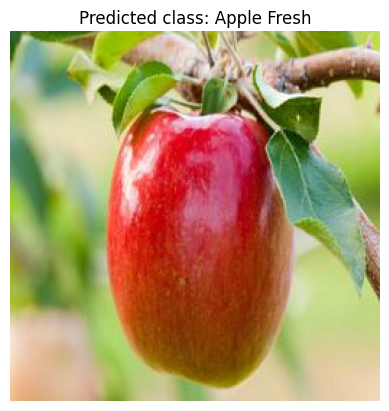

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Define image size
IMG_SIZE1 = 224  # Size of the images

# Load the MobileNetV2 model structure and weights
'''base_model1 = tf.keras.applications.MobileNetV2(input_shape=(IMG_SIZE1, IMG_SIZE1, 3),
                                               include_top=False,
                                               weights='imagenet')
base_model1.trainable = False'''

# Rebuild your model
'''model1 = tf.keras.Sequential([
    base_model1,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(train_generator1.class_indices), activation='softmax')  # Output layer
])'''

# Compile the model
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Load the saved weights
model1.load_weights('/content/drive/MyDrive/Fruits Detection and Quality Analysis.v1i.tensorflow/weights/model_epoch_10.h5')

def load_and_preprocess_image1(img_path1):
    """Load and preprocess the image for prediction."""
    img1 = image.load_img(img_path1, target_size=(IMG_SIZE1, IMG_SIZE1))
    img_array1 = image.img_to_array(img1)
    img_array1 = np.expand_dims(img_array1, axis=0)  # Add batch dimension
    img_array1 = img_array1 / 255.0  # Rescale to [0, 1]
    return img_array1

def predict_image1(img_path1):
    """Make a prediction for a single image using the loaded model and display it."""
    # Load and preprocess the image
    img_array1 = load_and_preprocess_image1(img_path1)

    # Make predictions
    predictions1 = model1.predict(img_array1)
    predicted_class1 = np.argmax(predictions1, axis=1)

    # Map predicted class back to the class name
    #class_labels1 = list(train_generator1.class_indices.keys())
    #print(class_labels1)
    class_labels1=['Apple Fresh', 'Apple Rotten', 'Apple Semifresh', 'Apple Semirotten', 'Banana Fresh', 'Banana Rotten', 'Banana Semifresh', 'Banana Semirotten', 'Mango Fresh', 'Mango Rotten', 'Mango Semifresh', 'Mango Semirotten', 'Melon Fresh', 'Melon Rotten', 'Melon Semifresh', 'Melon Semirotten', 'Orange Fresh', 'Orange Rotten', 'Orange Semifresh', 'Orange Semirotten', 'Peach Fresh', 'Peach Rotten', 'Peach Semifresh', 'Peach Semirotten', 'Pear Fresh', 'Pear Rotten', 'Pear Semifresh', 'Pear Semirotten']
    predicted_label1 = class_labels1[predicted_class1[0]]

    # Display the image and prediction results
    plt.imshow(image.load_img(img_path1))
    plt.axis('off')  # Turn off axis
    plt.title(f'Predicted class: {predicted_label1}')
    plt.show()

# Example usage
img_path1 = '/content/drive/MyDrive/Fruits Detection and Quality Analysis.v1i.tensorflow/test/Image_12_png.rf.a5bba61497c1d0bed89184a5cfbffc12.jpg'  # Replace with your image path
predict_image1(img_path1)


In [ ]:
!pip install streamlit
!pip install pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 81.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.0 MB/s eta 0:00:00


In [ ]:
# Step 2: Create the Streamlit app code
%%writefile app.py
import streamlit as st
from PIL import Image
import numpy as np

'''# Define your prediction functions
def load_and_preprocess_image(img):
    img_array = np.array(img)
    img_array = img_array / 255.0  # Rescale to [0, 1]
    return img_array

def predict_image(img_array):
    # Dummy prediction logic (replace this with your model prediction logic)
    # Example: Assuming the model returns a random class for demonstration
    classes = ["Fresh", "Rotten"]
    prediction = np.random.choice(classes)
    return prediction

def pred(img_array):
    # Implement your model's prediction logic here
    return predict_image(img_array)'''

# Create the Streamlit application
def main():
    st.title("Fruit Quality Prediction")

    # Button to upload image
    uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

    if uploaded_file is not None:
        # Display the image
        image = Image.open(uploaded_file)
        st.image(image, caption='Uploaded Image.', use_column_width=True)

        # Preprocess the image
        img_array = load_and_preprocess_image(image)

        # Button to predict
        if st.button("Predict"):
            # Call your prediction function
            predicted_label = pred(img_array)
            st.write(f'Predicted Quality: {predicted_label}')

if __name__ == "__main__":
    main()



Overwriting app.py


In [ ]:
# Step 3: Run Streamlit using ngrok
!streamlit run app.py & npx ngrok http 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.83.231.107:8501

  Stopping...
^C


In [ ]:
!ngrok authtoken 2n2jMUWZrdSIUGuPJtC2UazTJW2_3oJEoEuHqEKNbR6SetRGS


ngrok authtoken 2n2jMUWZrdSIUGuPJtC2UazTJW2_3oJEoEuHqEKNbR6SetRGS
Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!ngrok http 8501


Traceback (most recent call last):
  File "/usr/lib/python3.10/subprocess.py", line 1209, in wait
    return self._wait(timeout=timeout)
  File "/usr/lib/python3.10/subprocess.py", line 1959, in _wait
    (pid, sts) = self._try_wait(0)
  File "/usr/lib/python3.10/subprocess.py", line 1917, in _try_wait
    (pid, sts) = os.waitpid(self.pid, wait_flags)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/bin/ngrok", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/pyngrok/ngrok.py", line 582, in main
    run(sys.argv[1:])
  File "/usr/local/lib/python3.10/dist-packages/pyngrok/ngrok.py", line 570, in run
    process.run_process(pyngrok_config.ngrok_path, args)
  File "/usr/local/lib/python3.10/dist-packages/pyngrok/process.py", line 276, in run_process
    subprocess.call(start)
  File "/usr/lib/python3.10/subprocess.py", line 347, in call
    return p.wait(ti

In [ ]:
!pip install streamlit pyngrok


In [ ]:
%%writefile app1.py
import streamlit as st

st.title("Image Upload and Prediction")

# Image uploader
uploaded_file = st.file_uploader("Choose an image...", type="jpg")
if uploaded_file is not None:
    st.image(uploaded_file, caption='Uploaded Image.', use_column_width=True)
    st.write("Image uploaded successfully!")

# Button to trigger prediction
if st.button("Predict"):
    st.write("Prediction function goes here.")


Writing app1.py


In [ ]:
!streamlit run app.py --server.port 8501 &





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.83.231.107:8501

  Stopping...


In [ ]:
!pip install pyngrok


In [ ]:
from pyngrok import ngrok

# Connect Ngrok to the Streamlit app
public_url = ngrok.connect(8501)
print(f"Streamlit app is live at: {public_url}")


Streamlit app is live at: NgrokTunnel: "https://1970-34-83-231-107.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
!pip install streamlit


In [ ]:
%%writefile app2.py
import streamlit as st
from PIL import Image
import numpy as np

st.title("Image Prediction App")

uploaded_file = st.file_uploader("Choose an image...", type="jpg")

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded Image.', use_column_width=True)
    st.write("")
    st.write("Classifying...")

    # Simulating prediction
    prediction = "This is a placeholder prediction."
    st.write(prediction)


Writing app2.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.83.231.107:8501

your url is: https://ninety-horses-shave.loca.lt
  Stopping...
^C
